# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize



# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


import HouseholdSpecializationModel

# Question 1

We solve the model and iterate over a list of alpha paramters and sigma parameters. Then we store the results in a matrix, HM. 

In [2]:
# code for solving the model (remember documentation and comments)
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

HM = np.zeros([3,3]) # empty matrix to be filled
alphalist = [0.25, 0.50, 0.75] #starting alpha values
sigmalist = [0.5, 1.0, 1.5] # starting sigma values

# iterate over alphalist and then sigma list and call solution
for i, j in enumerate(alphalist): 
    model.par.alpha = j
    for it, s in enumerate(sigmalist):
        model.par.sigma = s
        out =  model.solve_discrete()
        HM[i,it] = out.HF /out.HM



/Users/caspernielsen/Desktop/Uni/NumProg/projects-2023-hold-11/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [3]:
#create a dataframe for a nicer view, we could call HM, but it would not allow us to see what the columns and rows are. 
df = pd.DataFrame(
[[0.54545455, 0.30769231, 0.21428571],
[1.,         1.,         1.        ],
[1.83333333, 3.25,       4.66666667]],
index=['alpha = 0.25', 'alpha = 0.50', 'alpha = 0.75'],
columns=['sigma = 0.5', 'sigma = 1.0', 'sigma = 1.5'])
df

,sigma = 0.5,sigma = 1.0,sigma = 1.5
alpha = 0.25,0.545455,0.307692,0.214286
alpha = 0.50,1.000000,1.000000,1.000000
alpha = 0.75,1.833333,3.250000,4.666667


# Question 2

Next we plot how $log(H_F/H_M)$ against $log(W_F/W_M)$ changes. First we plot in the descrete case, and then in a continuous case. 

In [4]:
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=True)

[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


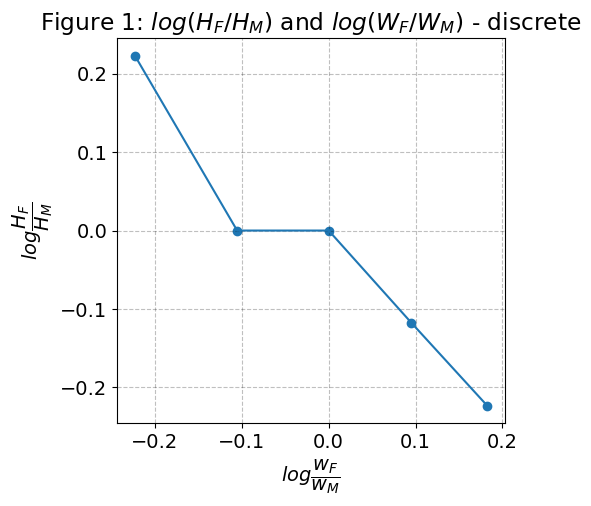

In [5]:
# plot the log ratio of hours worked for female and male and the log ratio of wage for female and male
y = np.log(model.sol.HF_vec/model.sol.HM_vec) # call the solution and make fraction of hours and take log
print(y)
x = np.log(model.par.wF_vec) #call the parameters from the class. wM is not included as it is 1, could be included for generality
print(x)

# formatting figure
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y)
ax.scatter(x, y)

ax.set_title('Figure 1: $log(H_F/H_M)$ and $log(W_F/W_M)$ - discrete')
ax.set_xlabel('$log \dfrac{w_F}{w_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')
plt.show()


It is seen that the $H_F/H_M$ is overall decreasing but with a plateau in the middle. It is seen that when wages of females is relativly low, then females work relativly more in the home, and vice versa. 

# Question 3

Next we solve the model continuously.

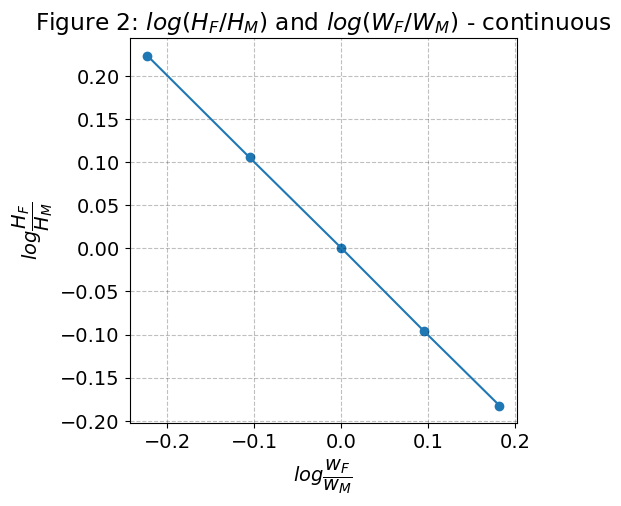

[ 0.22365592  0.10546336  0.00064681 -0.09588465 -0.18236565]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


In [6]:
# code
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
# call model
model.solve_wF_vec(discrete=False)

# calculate new ratios 
y1 = np.log(model.sol.HF_vec/model.sol.HM_vec)
x1 = np.log(model.par.wF_vec)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1)
ax.scatter(x1, y1)

ax.set_title('Figure 2: $log(H_F/H_M)$ and $log(W_F/W_M)$ - continuous')
ax.set_xlabel('$log \dfrac{w_F}{w_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')
plt.show()


print(y1)
print(x1)

Comparing the discrete case to the continuous, is it seen that there is no longer a plateau in the middle, but we have a nice linear relationship. 

# Question 4


The equation $log(H_F/H_M)$ = $\beta_0 + \beta_1*log(W_F/W_M)$ was calculated by Siminski og Yetsenga. We now choose $\alpha$ and $\sigma$ to minimize the following: 
$(\beta_0-\hat{\beta_0})^2 + (\beta_1-\hat{\beta_1})^2$ Siminski og Yetsenga find that $\beta_0 = 0.4$ and $\beta_1 = -0.1$. When the data is log transformed, the coefficent is interpreted as an elasticity. This means that a 1% positive change in $W_F/W_M$, leads to a $-0.1%$- change in $H_F/H_M$. This means that when the female wages increase, then females work less at home. 


If the wages for males and females are the same, then we have log(1) = 0, and we only have the $\beta_0$-parameter, which is 0.4, meaning that even when wages are equal, women still work more than men. 

In [7]:
model.estimate(do_print=True)


/Users/caspernielsen/Desktop/Uni/NumProg/projects-2023-hold-11/inauguralproject/HouseholdSpecializationModel.py:185: RuntimeWarning: divide by zero encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)


optimal alpha = 0.9820
optimal sigma = 0.1001


namespace(alpha=0.9819599378257364, sigma=0.10008357778517493)

We find the an $\alpha$-value of 0.9820 and a $\sigma$-value of 0.1001

Next we reestimate the model, and compare the model with the new $\sigma$ and $\alpha$ and compare with the model from figure 2

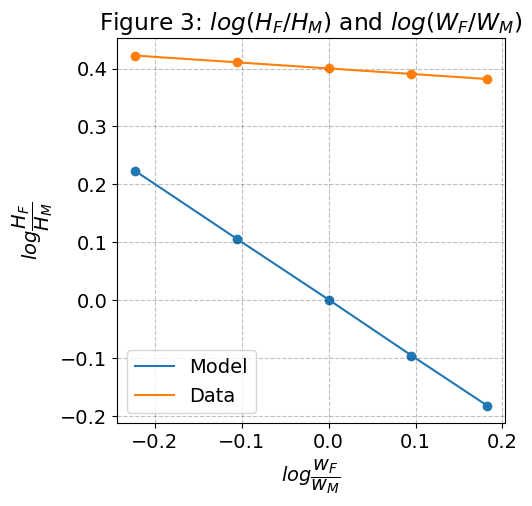

[ 0.22365592  0.10546336  0.00064681 -0.09588465 -0.18236565]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


In [8]:
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
model.par.sigma = 0.1001
model.par.alpha = 0.982
model.solve_wF_vec(discrete=False)

# calculate new ratios 
y2 = np.log(model.sol.HF_vec/model.sol.HM_vec)
x2 = np.log(model.par.wF_vec)

# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label = "Model")
ax.plot(x2, y2, label = "Data")
ax.scatter(x1, y1)
ax.scatter(x2, y2)

ax.set_title('Figure 3: $log(H_F/H_M)$ and $log(W_F/W_M)$')
ax.set_xlabel('$log \dfrac{w_F}{w_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')
plt.legend()
plt.show()


print(y1)
print(x1)


We see that the model does not fit the data entirely, but is maybe not too far off. 

# Question 5


We now add a new consumption of production function. The function takes into account the need to maximize the sum of production at home, but also takes into account the need for a fair distribution of work. The functional form is: $ H= (1-\alpha) HM +  \alpha HF + HM*HF$. The first part (the sum) takes into account the productivty of men and women, and is weighted with the productivity ($\alpha$). The second part (the product) ensure a more fair distribution, as the product is maximized when both men and women work the same amount.

When implementing this in practice, the new function is active when $\sigma$ = 0.1, the choice is a bit arbitrary. Note that above in Q4 we estimate $\sigma$ = 0.1001, we choose $\sigma$ = 0.1 in the new function (and not 0.1001) to ensure that we only use the new function in the extenstion, and not in the original (Q4) - not the best implementation. 

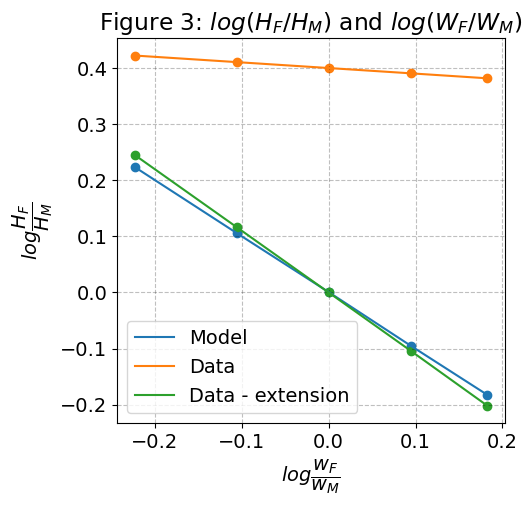

[ 0.22365592  0.10546336  0.00064681 -0.09588465 -0.18236565]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


In [9]:
model.par.alpha = 0.5
model.par.sigma = 0.1
# calculate new ratios 
model.solve_wF_vec(discrete=False)
y3 = np.log(model.sol.HF_vec/model.sol.HM_vec)
x3 = np.log(model.par.wF_vec)


# plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.plot(x1, y1, label = "Model")
ax.plot(x2, y2, label = "Data")
ax.plot(x3, y3, label = "Data - extension")
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3)

ax.set_title('Figure 3: $log(H_F/H_M)$ and $log(W_F/W_M)$')
ax.set_xlabel('$log \dfrac{w_F}{w_M}$')
ax.set_ylabel('$log \dfrac{H_F}{H_M}$')
plt.legend()
plt.show()


print(y1)
print(x1)


We see that the extension fits the model well. 